In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [5]:
data = keras.datasets.fashion_mnist

In [6]:
# Loading the datasets & Splitting into train data and test data
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [16]:
# Labels of the output
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [17]:
# Normalizing the train data & test data
train_images = keras.utils.normalize(train_images, axis=1)
test_images = keras.utils.normalize(test_images, axis=1)

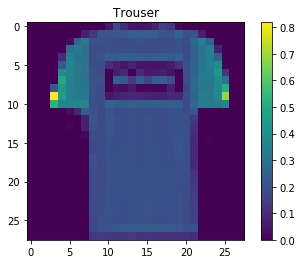

In [22]:
# Visualization of some images
plt.figure()
plt.title(class_names[1])
plt.imshow(train_images[1])
plt.colorbar()
plt.show()

In [11]:
# Building the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [23]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
# Train the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2079 - acc: 0.9206
Epoch 2/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1996 - acc: 0.9245
Epoch 3/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1905 - acc: 0.9286
Epoch 4/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1828 - acc: 0.9296
Epoch 5/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1750 - acc: 0.9336
Epoch 6/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.1686 - acc: 0.9365
Epoch 7/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.1623 - acc: 0.9386
Epoch 8/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.1599 - acc: 0.9392
Epoch 9/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1528 - acc: 0.9418
Epoch 10/10
60000/60000 [==============================] - 5s 88us/sample - loss: 

In [29]:
# Evaluate the model to find loss & accuracy
loss, acc = model.evaluate(test_images, test_labels)
print(f'loss: {loss}')
print(f'accuracy: {acc}')

10000/10000 [==============================] - 0s 44us/sample - loss: 0.3773 - acc: 0.8889
loss: 0.37733435640335083
accuracy: 0.8888999819755554


In [30]:
# Save the model & Load
model.save('fashion_predictor.model')
fashion_predictor = keras.models.load_model('fashion_predictor.model')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [36]:
# Make predictions
predictions = fashion_predictor.predict(test_images)
predictions[15]

array([1.6161748e-12, 1.0000000e+00, 4.6762512e-13, 6.0277855e-10,
       4.7931685e-12, 2.5438434e-18, 4.9050855e-12, 6.9397465e-19,
       3.5317958e-15, 3.2780059e-18], dtype=float32)

In [37]:
import numpy as np

In [59]:
predict_index = np.argmax(predictions[22])
class_names[predict_index]

'Sneaker'

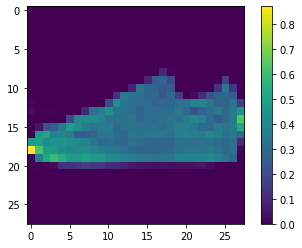

In [60]:
# Visualizing
plt.figure()
plt.imshow(test_images[22])
plt.colorbar()
plt.show()

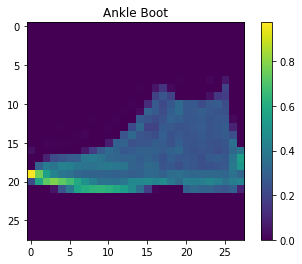

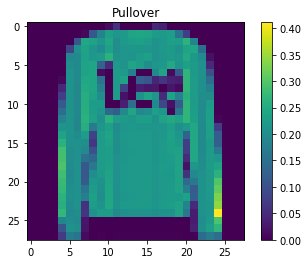

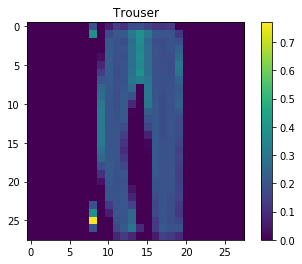

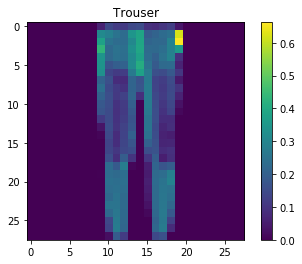

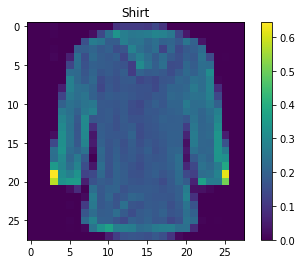

In [61]:
# Visualize the first predictions
for i in range(5):
    plt.figure()
    plt.title(class_names[np.argmax(predictions[i])])
    plt.imshow(test_images[i])
    plt.colorbar()
    plt.show()